CAPSTONE Three.

# Hate Speech and Offensive Language detection

## Introduction

NLP Model to Predict Hate Speech

Dataset using Twitter data, is was used to research hate-speech detection. The text is classified as: hate-speech, offensive language, and neither. 

**Due to the nature of the study, it’s important to note that this dataset contains text that can be considered racist, sexist, homophobic, or generally offensive.


## Imports

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

from scipy import stats
# random enables us to generate random numbers
import random



from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import confusion_matrix, accuracy_score, plot_confusion_matrix, classification_report


In [2]:
import re
import nltk
from nltk.tokenize.toktok import ToktokTokenizer
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer
from bs4 import BeautifulSoup
import unicodedata

from nltk.tokenize import TweetTokenizer


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/natakat/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


##  Load the data

Load the Hate Speach and Offensive language dataset (labeled_data.csv)

In [3]:
hate_speach = pd.read_csv('../data/labeled_data.csv')

In [4]:
hate_speach.head()

,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet
0,0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...


In [5]:
hate_speach.tail()

,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet
24778,25291,3,0,2,1,1,you's a muthaf***in lie &#8220;@LifeAsKing: @2...
24779,25292,3,0,1,2,2,"you've gone and broke the wrong heart baby, an..."
24780,25294,3,0,3,0,1,young buck wanna eat!!.. dat nigguh like I ain...
24781,25295,6,0,6,0,1,youu got wild bitches tellin you lies
24782,25296,3,0,0,3,2,~~Ruffled | Ntac Eileen Dahlia - Beautiful col...


In [6]:
hate_speach.shape

(24783, 7)

 # 2. DATA WRANGLING

## 2.1. Data definition

### Column names and data type

In [7]:
hate_speach.columns

Index(['Unnamed: 0', 'count', 'hate_speech', 'offensive_language', 'neither',
       'class', 'tweet'],
      dtype='object')

In [8]:
hate_speach.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24783 entries, 0 to 24782
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          24783 non-null  int64 
 1   count               24783 non-null  int64 
 2   hate_speech         24783 non-null  int64 
 3   offensive_language  24783 non-null  int64 
 4   neither             24783 non-null  int64 
 5   class               24783 non-null  int64 
 6   tweet               24783 non-null  object
dtypes: int64(6), object(1)
memory usage: 1.3+ MB


### Numerical features

In [9]:
num_features = hate_speach.select_dtypes(include =[np.number])
num_features.T

,0,1,2,3,4,5,6,7,8,9,...,24773,24774,24775,24776,24777,24778,24779,24780,24781,24782
Unnamed: 0,0,1,2,3,4,5,6,7,8,9,...,25286,25287,25288,25289,25290,25291,25292,25294,25295,25296
count,3,3,3,3,6,3,3,3,3,3,...,3,3,3,3,3,3,3,3,6,3
hate_speech,0,0,0,0,0,1,0,0,0,1,...,1,0,0,3,2,0,0,0,0,0
offensive_language,0,3,3,2,6,2,3,3,3,2,...,2,3,3,0,1,2,1,3,6,0
neither,3,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,1,2,0,0,3
class,2,1,1,1,1,1,1,1,1,1,...,1,1,1,0,0,1,2,1,1,2


### Non-numeric features

In [10]:
categorical_features = hate_speach.select_dtypes(exclude=np.number)
categorical_features

,tweet
0,!!! RT @mayasolovely: As a woman you shouldn't...
1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...
...,...
24778,you's a muthaf***in lie &#8220;@LifeAsKing: @2...
24779,"you've gone and broke the wrong heart baby, an..."
24780,young buck wanna eat!!.. dat nigguh like I ain...
24781,youu got wild bitches tellin you lies


### Overall statistics

Calculate summary statistics for each of dataframe columns(count, mean, median, mode, standard deviation, min, max)

In [11]:
hate_speach.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,24783.0,12681.192027,7299.553863,0.0,6372.5,12703.0,18995.5,25296.0
count,24783.0,3.243473,0.883060,3.0,3.0,3.0,3.0,9.0
hate_speech,24783.0,0.280515,0.631851,0.0,0.0,0.0,0.0,7.0
offensive_language,24783.0,2.413711,1.399459,0.0,2.0,3.0,3.0,9.0
neither,24783.0,0.549247,1.113299,0.0,0.0,0.0,0.0,9.0
class,24783.0,1.110277,0.462089,0.0,1.0,1.0,1.0,2.0


count - number of CrowdFlower users who coded each tweet (min is 3, sometimes more users coded a tweet when
hate_speech - number of CF users who judged the tweet to be hate speech
offensive_language - number of CF users who judged the tweet to be offensive
neither - number of CF users who judged the tweet to be neither offensive nor non-offensive
class - class label for majority of CF users. 0 - hate speech 1 - offensive language 2 - neither

## 2.2. Data cleaning

Let's check if we have features that missing a lot of data. It is common practice to drop the feature that are missing more than 80% of data.

In [12]:
#Count (using `.sum()`) the number of missing values (`.isnull()`) in each column of 
#hate_speach as well as the percentages (using `.mean()` instead of `.sum()`).
#Order them (increasing or decreasing) using sort_values
#Call `pd.concat` to present these in a single table (DataFrame) with the helpful column names 'count' and '%'
missing = pd.concat([hate_speach.isnull().sum(), 100 * hate_speach.isnull().mean()], axis=1)
missing.columns=['count', '%']
missing.sort_values(by='count', ascending=False)

,count,%
Unnamed: 0,0,0.0
count,0,0.0
hate_speech,0,0.0
offensive_language,0,0.0
neither,0,0.0
class,0,0.0
tweet,0,0.0


There is no missing data. We have very clean dataset

## 2.3 Text Wrangling & Pre-processing

- Lowercase text
- Remove whitespace
- Remove numbers
- Remove special characters
- Remove emails
- Remove stop words
- Remove NAN
- Remove weblinks
- Expand contractions (if possible not necessary)
- Tokenize

In [13]:
import nltk
from nltk.tokenize import RegexpTokenizer
from nltk.stem import WordNetLemmatizer,PorterStemmer
from nltk.corpus import stopwords
import re
nltk.download('wordnet')

lemmatizer = WordNetLemmatizer()
stemmer = PorterStemmer() 

 

[nltk_data] Downloading package wordnet to /Users/natakat/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [14]:
def preprocess(sentence):
    sentence=str(sentence)
    sentence = sentence.lower()
    sentence=sentence.replace('{html}',"") 
    cleanr = re.compile('<.*?>')
    cleantext = re.sub(cleanr, '', sentence)
    rem_url=re.sub(r'http\S+', '',cleantext)
    rem_num = re.sub('[0-9]+', '', rem_url)
    tokenizer = RegexpTokenizer(r'\w+')
    tokens = tokenizer.tokenize(rem_num)  
    filtered_words = [w for w in tokens if len(w) > 2 if not w in stopwords.words('english')]
    stem_words=[stemmer.stem(w) for w in filtered_words]
    lemma_words=[lemmatizer.lemmatize(w) for w in stem_words]
    return " ".join(filtered_words)




In [15]:
hate_speach['cleanTweet']=hate_speach['tweet'].map(lambda s:preprocess(s)) 

In [16]:
hate_speach

,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet,cleanTweet
0,0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...,mayasolovely woman complain cleaning house amp...
1,1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...,mleew boy dats cold tyga dwn bad cuffin dat ho...
2,2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...,urkindofbrand dawg sbabylife ever fuck bitch s...
3,3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...,c_g_anderson viva_based look like tranny
4,4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...,shenikaroberts shit hear might true might fake...
...,...,...,...,...,...,...,...,...
24778,25291,3,0,2,1,1,you's a muthaf***in lie &#8220;@LifeAsKing: @2...,muthaf lie lifeasking _pearls corey_emanuel ri...
24779,25292,3,0,1,2,2,"you've gone and broke the wrong heart baby, an...",gone broke wrong heart baby drove redneck crazy
24780,25294,3,0,3,0,1,young buck wanna eat!!.. dat nigguh like I ain...,young buck wanna eat dat nigguh like aint fuck...
24781,25295,6,0,6,0,1,youu got wild bitches tellin you lies,youu got wild bitches tellin lies


# 3. Exploratory Data Analysis (EDA)

### Columns distributions

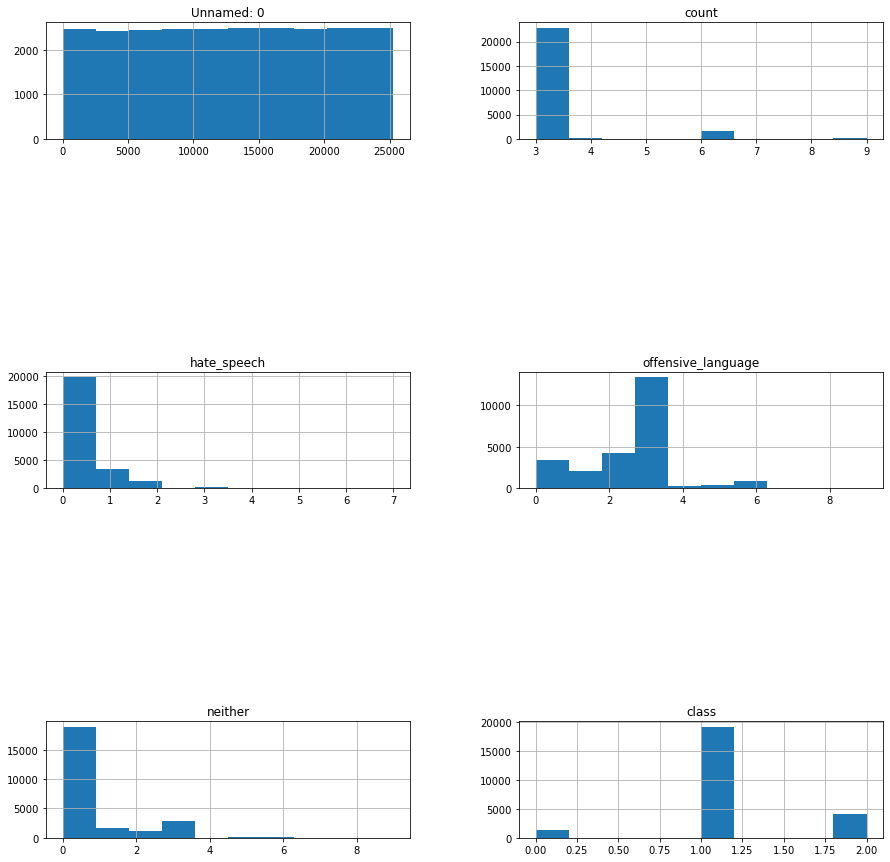

In [17]:
hate_speach.hist(figsize=(15, 15))
plt.subplots_adjust(hspace=2);

### Class label ( 0 - hate speech, 1 - offensive language, 2 - neither)

In [18]:
hate_speach['class'].value_counts()

1    19190
2     4163
0     1430
Name: class, dtype: int64

<AxesSubplot:>

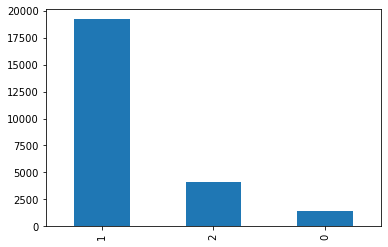

In [19]:
hate_speach['class'].value_counts().plot(kind='bar')

In [20]:
class_df = hate_speach['class']
class_df = pd.get_dummies(class_df)

In [21]:
corr_class = class_df.corr()

## Correlation matrix of the tweets classifications

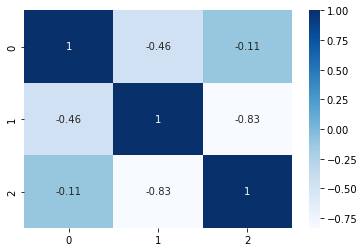

In [22]:
#plt.matshow(corr_class)
#plt.show()

sns.heatmap(corr_class, annot = True, cmap="Blues")
plt.show()


### Hate speach records

1430 records out of 24783 have been marked as a hate speach

In [23]:
hs = hate_speach.loc[hate_speach['class'] == 0]
hs["cleanTweet"]

85       blackmantide whalelookyhere howdydowdy queer g...
89       cb_baby white_thunduh alsarabsss hes beaner sm...
110      devilgrimz vigxrarts fucking gay blacklisted h...
184      markroundtreejr lmfaoooo hate black people bla...
202                          nochillpaz least nigger lmfao
                               ...                        
24576                              guy biggest faggot omfg
24685    one names offensive kike wop kraut wetback jig...
24751                           pussy ass nigga know nigga
24776                                              niggers
24777    retard hope get type diabetes die sugar rush f...
Name: cleanTweet, Length: 1430, dtype: object

### Offensive language records

19190 records out of 24783 have been marked as a offensive language

In [24]:
ol = hate_speach.loc[hate_speach['class'] == 0]
ol["cleanTweet"]

85       blackmantide whalelookyhere howdydowdy queer g...
89       cb_baby white_thunduh alsarabsss hes beaner sm...
110      devilgrimz vigxrarts fucking gay blacklisted h...
184      markroundtreejr lmfaoooo hate black people bla...
202                          nochillpaz least nigger lmfao
                               ...                        
24576                              guy biggest faggot omfg
24685    one names offensive kike wop kraut wetback jig...
24751                           pussy ass nigga know nigga
24776                                              niggers
24777    retard hope get type diabetes die sugar rush f...
Name: cleanTweet, Length: 1430, dtype: object

## Scatter and Density Plot of the tweets subjectives

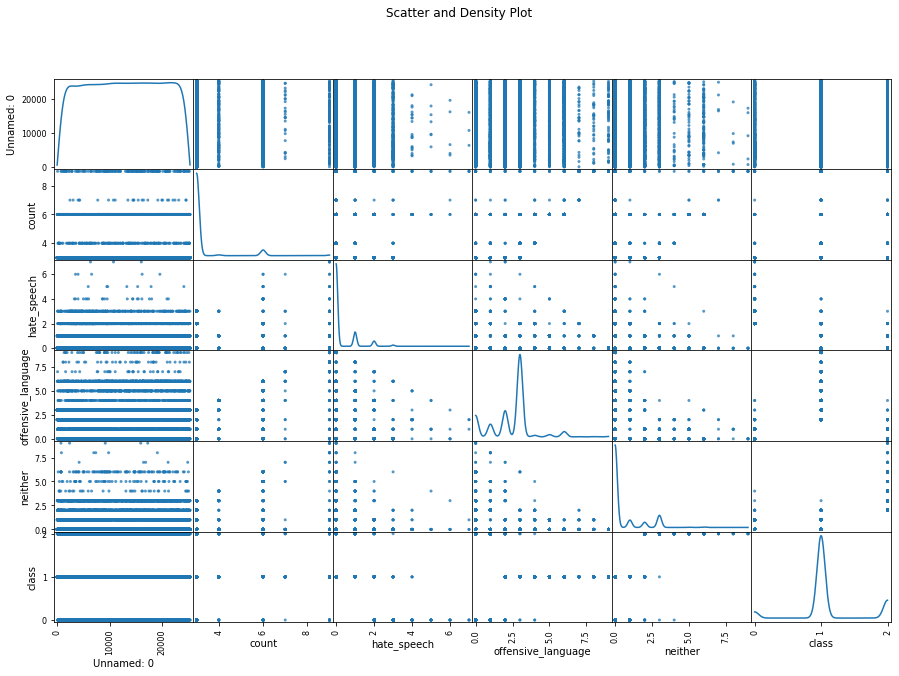

In [25]:
ax = pd.plotting.scatter_matrix(num_features, alpha=0.75, figsize=[15, 10], diagonal='kde')
plt.suptitle('Scatter and Density Plot') 
plt.show()

## Pearson correlation matrix of the tweets subjectives

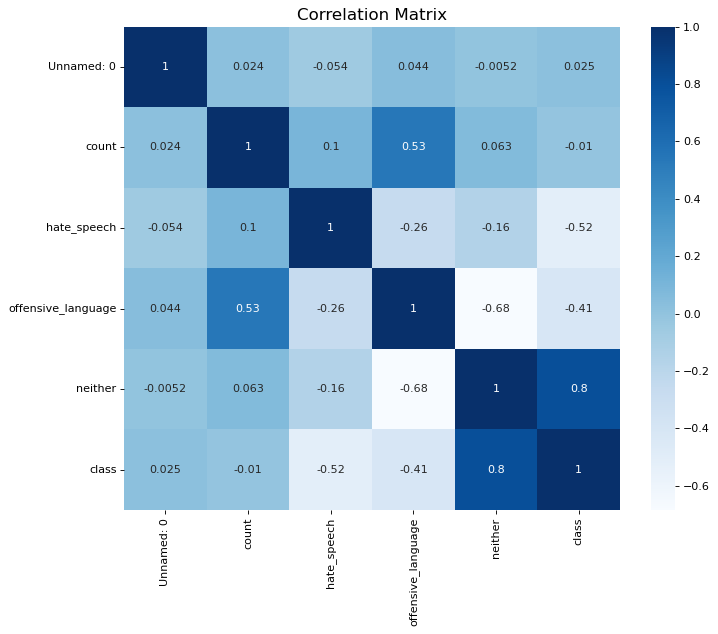

In [26]:
plt.figure(num=None, figsize=(10, 8), dpi=80, facecolor='w', edgecolor='k')
corr_matrix = num_features.corr()
sns.heatmap(corr_matrix, annot = True, cmap="Blues")
plt.title('Correlation Matrix', fontsize=15)
plt.show()